In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [275]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [276]:
df = pd.read_csv('./cancer.csv', na_values='#')
df.drop('S/N', axis=1, inplace=True)

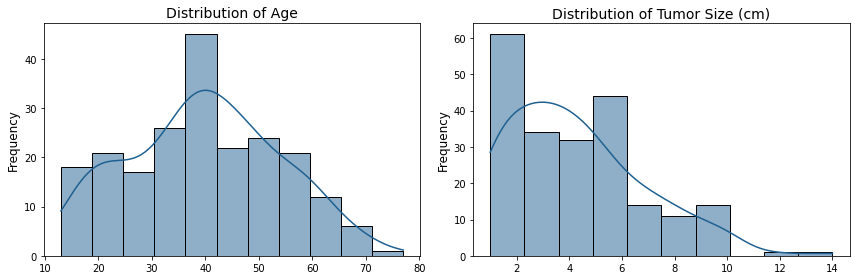

In [277]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x='Age', kde=True, color='#1e6091', edgecolor='black', ax=axes[0])
axes[0].set_title(f'Distribution of Age', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(False)

sns.histplot(data=df, x='Tumor Size (cm)', kde=True, color='#1e6091', edgecolor='black', ax=axes[1])
axes[1].set_title(f'Distribution of Tumor Size (cm)', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(False)

plt.tight_layout()
plt.show()


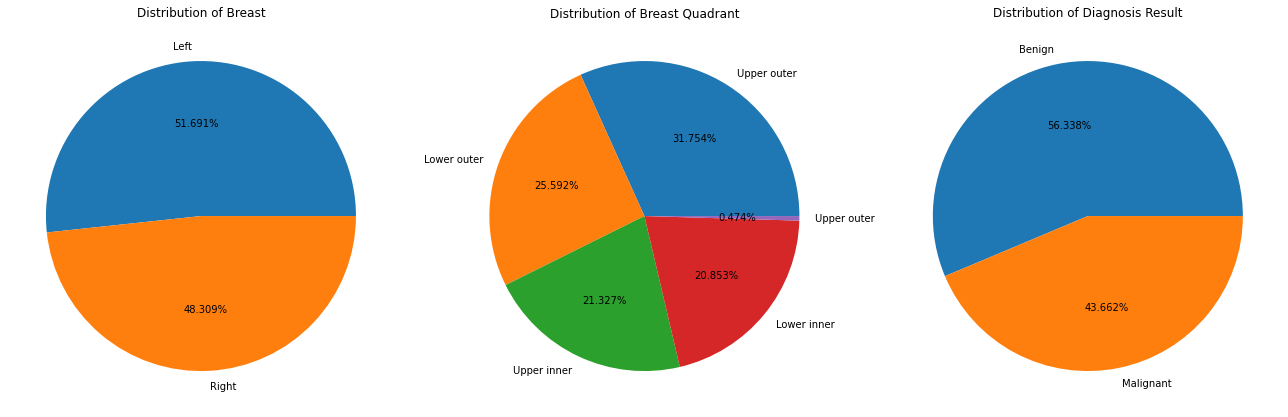

In [278]:
string_counts = {}
for column in df.select_dtypes(include='object'):
    string_counts[column] = df[column].value_counts()

plt.figure(figsize=(18, 6))
num_plots = len(string_counts)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

for i, (column, counts) in enumerate(string_counts.items()):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.pie(counts.values, labels=counts.index, autopct='%1.3f%%')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

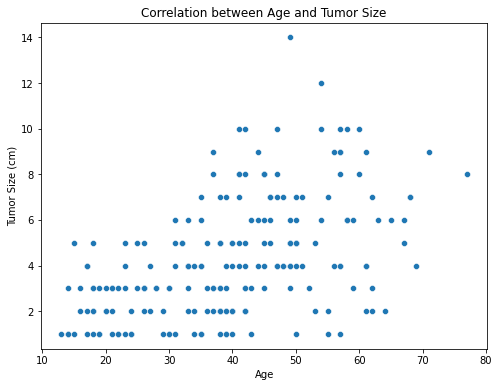

In [279]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Tumor Size (cm)', data=df)
plt.title('Correlation between Age and Tumor Size')
plt.xlabel('Age')
plt.ylabel('Tumor Size (cm)')
plt.show()

In [280]:
df['Diagnosis Result'] = label_encoder.fit_transform(df['Diagnosis Result'])
df['Breast'] = label_encoder.fit_transform(df['Breast'])
df['Breast Quadrant'] = label_encoder.fit_transform(df['Breast Quadrant'])
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019.0,40,1,2.0,0.0,1,0.0,2,0.0,0
1,2019.0,39,1,2.0,0.0,0,0.0,3,0.0,0
2,2019.0,45,0,4.0,0.0,0,0.0,1,0.0,0
3,2019.0,26,1,3.0,0.0,0,0.0,0,1.0,0
4,2019.0,21,1,1.0,0.0,1,0.0,3,1.0,0
...,...,...,...,...,...,...,...,...,...,...
208,2020.0,49,1,6.0,3.0,1,1.0,0,1.0,1
209,2020.0,28,1,3.0,0.0,0,0.0,2,0.0,0
210,2020.0,22,1,1.0,0.0,0,0.0,3,1.0,0
211,2020.0,19,1,1.0,0.0,0,0.0,0,1.0,0


### Predict NaN value

In [281]:
for col in df.columns:
    if df[col].isnull().any():
        train_data = df.dropna()
        y_train = train_data[col]
        X_train = train_data.drop(col, axis=1)
            
        test_data = df.fillna(df.mean(axis=0)) 
        test_data = test_data[df[col].isnull()] 
        X_test = test_data.drop(col, axis=1)
            
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        df.loc[df[col].isnull(), col] = model.predict(X_test)

In [282]:
df[['Year','Age','Tumor Size (cm)','Inv-Nodes','Breast Quadrant']] = scaler.fit_transform(df[['Year','Age','Tumor Size (cm)','Inv-Nodes','Breast Quadrant']])
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,-1.051048,0.015356,1,-0.886464,-0.695519,1,0.0,0.265969,0.0,0
1,-1.051048,-0.055749,1,-0.886464,-0.695519,0,0.0,1.111514,0.0,0
2,-1.051048,0.370884,0,-0.105148,-0.695519,0,0.0,-0.579575,0.0,0
3,-1.051048,-0.980123,1,-0.495806,-0.695519,0,0.0,-1.425119,1.0,0
4,-1.051048,-1.335651,1,-1.277123,-0.695519,1,0.0,1.111514,1.0,0
...,...,...,...,...,...,...,...,...,...,...
208,0.955884,0.655307,1,0.676169,5.230300,1,1.0,-1.425119,1.0,1
209,0.955884,-0.837912,1,-0.495806,-0.695519,0,0.0,0.265969,0.0,0
210,0.955884,-1.264545,1,-1.277123,-0.695519,0,0.0,1.111514,1.0,0
211,0.955884,-1.477862,1,-1.277123,-0.695519,0,0.0,-1.425119,1.0,0


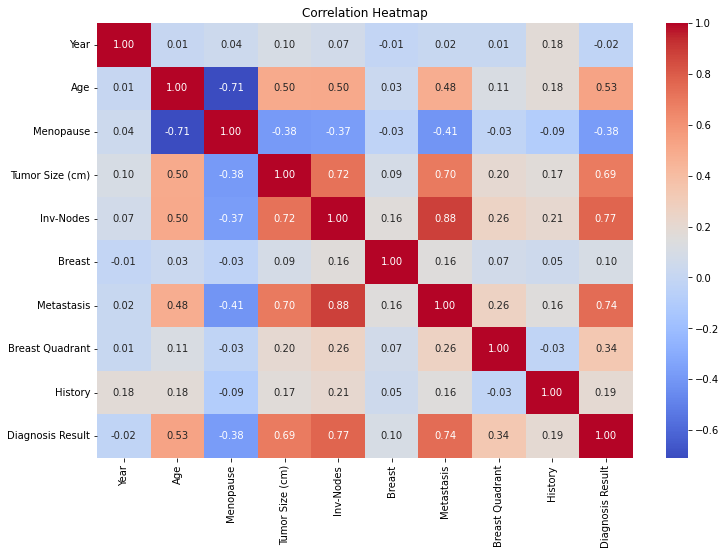

In [283]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [284]:
X = df.drop('Diagnosis Result', axis=1)
y = df['Diagnosis Result']

In [285]:
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.3, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

In [286]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [287]:
def compute_loss(X, y, theta):
    n_samples = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    loss = -1/n_samples * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

In [288]:
def logistic_regression(X, y, X_val, y_val, learning_rate, num_iterations, add_intercept=False, threshold=3):
    if add_intercept:
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        X_val = np.hstack((np.ones((X_val.shape[0], 1)) , X_val))
    
    n_features = X.shape[1]; n_samples = X.shape[0]

    theta = np.zeros(n_features)
    best_loss = np.inf
    patient_counter = 0

    for i in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / n_samples
        theta -= learning_rate * gradient
        train_loss = compute_loss(X, y, theta)
        
        # calculate validation loss
        val_loss = compute_loss(X_val, y_val, theta)

        if val_loss > best_loss:
            patient_counter += 1
            if patient_counter == threshold :
                print(f'Alpha {learning_rate}, Validation loss did not improve for {threshold} iterations.') 
                print(f'Stopping training in Iteration {i} with Validation Loss: {val_loss}')
                break
        else:
            best_loss = val_loss
            patient_counter = 0

        if i % 3000 == 0:
            print(f'Alpha {learning_rate}, Iteration {i}, Training Loss: {train_loss}, Validation Loss: {val_loss}')

    return  compute_loss(X_val, y_val, theta), theta

In [289]:
def predict(X, theta, threshold=0.5):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold)
    return predictions

The value of precision is equal to dividing tp (the number of correct predictions, which was 1) by the sum of tp plus fp (the actual value was 0, but we predicted 1). In other words, of all the samples that the model detected as positive, what percentage of them were actually positive?

the value of Recall is tp / (tp + fn) which fn is the actual value is 1, but we have mistakenly predicted 1, recall indicates how many true positive samples were identified by the model.

the value of f1 score is 2 * (precision * recall) / (precision + recall), his metric provides a balanced measure between Precision and Recall.

In [290]:
def accuracy(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (true_positives + true_negatives) / len(y_true)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return accuracy * 100, precision * 100, recall * 100, f1_score * 100

In [291]:
num_iterations = 50000
alphas_to_test = [1, 0.01, 0.00001]; losses = []; thetas =[]

for alpha in alphas_to_test:
    loss , theta_hat = logistic_regression(X_train.values, y_train.values, X_eval, y_eval, alpha, num_iterations, add_intercept=True , threshold=400)
    losses.append(loss)
    thetas.append(theta_hat)
    print(100*'#')

theta_hat = thetas[np.argmin(losses)]

Alpha 1, Iteration 0, Training Loss: 0.40522528260109597, Validation Loss: 0.398226423558968
Alpha 1, Validation loss did not improve for 400 iterations.
Stopping training in Iteration 428 with Validation Loss: 0.24385244340791448
####################################################################################################
Alpha 0.01, Iteration 0, Training Loss: 0.6891840855741341, Validation Loss: 0.6890265424511355
Alpha 0.01, Iteration 3000, Training Loss: 0.213074433381857, Validation Loss: 0.2307176640213635
Alpha 0.01, Validation loss did not improve for 400 iterations.
Stopping training in Iteration 3522 with Validation Loss: 0.2307859433869875
####################################################################################################
Alpha 1e-05, Iteration 0, Training Loss: 0.6931432058242116, Validation Loss: 0.6931430471521871
Alpha 1e-05, Iteration 3000, Training Loss: 0.6814263265562321, Validation Loss: 0.680964400916604
Alpha 1e-05, Iteration 6000, Trainin

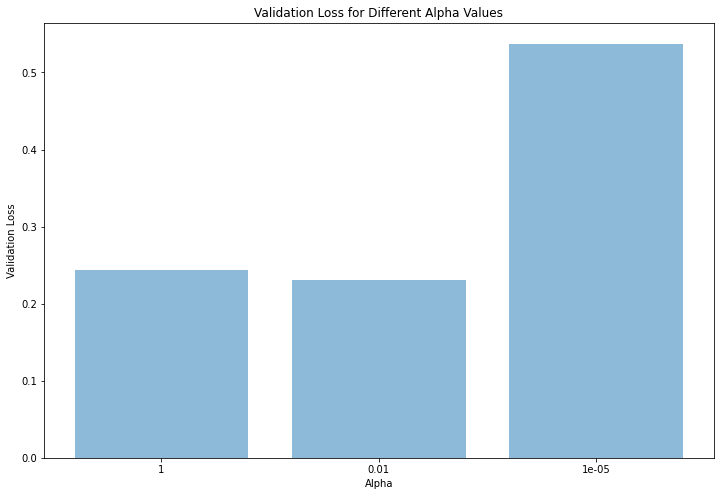

In [292]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(alphas_to_test)), losses, align='center', alpha=0.5)
plt.xticks(np.arange(len(alphas_to_test)), [str(alpha) for alpha in alphas_to_test])
plt.xlabel('Alpha')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Alpha Values')
plt.show()

In [293]:
threshold = 0.5

y_pred = predict(X_eval.values, theta_hat, threshold)
accuracy_score, precision, recall, f1_score = accuracy(y_eval.values, y_pred)
print("validation data")
print('----------------')
print(f'Accuracy = {accuracy_score:.3f}%')
print(f'Precision: {precision:.3f}%, Recall: {recall:.3f}%, F1 Score: {f1_score:.3f}%')

print('\n',60*'%','\n')

y_pred = predict(X_test.values, theta_hat, threshold)
accuracy_score, precision, recall, f1_score = accuracy(y_test.values, y_pred)
print("test data")
print('----------------')
print(f'Accuracy = {accuracy_score:.3f}%')
print(f'Precision: {precision:.3f}%, Recall: {recall:.3f}%, F1 Score: {f1_score:.3f}%')

validation data
----------------
Accuracy = 90.625%
Precision: 90.909%, Recall: 83.333%, F1 Score: 86.957%

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 

test data
----------------
Accuracy = 87.500%
Precision: 90.909%, Recall: 76.923%, F1 Score: 83.333%
